# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 43

Członkowie: Dominik Sakłaski (415120), Roksana Jandura (416314), Karolina Murzyn (409892)

---

## Zestaw zadań 3: Ruch rowery na moście Fremont w Seattle (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from scipy.stats import linregress
from scipy.optimize import curve_fit


### Wczytanie danych
Poniższy kod wczytuje do zmiennych `daily_bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików daily_bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
daily_bike_traffic_data = pd.read_pickle("daily_bike_traffic_data.pkl")
daily_bike_traffic_data

,Total,East,West
Date,,,
2022-01-01,33.0,23.0,10.0
2022-01-02,37.0,20.0,17.0
2022-01-03,253.0,93.0,160.0
2022-01-04,577.0,220.0,357.0
2022-01-05,713.0,261.0,452.0
...,...,...,...
2022-12-27,429.0,181.0,248.0
2022-12-28,1108.0,449.0,659.0
2022-12-29,687.0,261.0,426.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

### Zadnie 4: Analiza korelacji [10 pkt]

#### a) Korelacje liniowe pomiędzy parametrami pogody a liczbą rowerzystów

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_1` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_1` pomiędzy wartościami parametrów pogody, a liczbą rowerzystów przejeżdżających przez most danego dnia.

Tablice powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data` </br>

> Kolumny: zestaw indeksów identycznych z nazwami kolumn tablicy `daily_bike_traffic_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [5]:
# Tabela R
# YOUR CODE HERE
data = pd.concat([weather_data, daily_bike_traffic_data], axis=1)
pearson_matrix = data.corr(method='pearson')

weather_cols = weather_data.columns
bike_cols = daily_bike_traffic_data.columns

R_corr_1 = pearson_matrix.loc[weather_cols, bike_cols]
R_corr_1.index = weather_cols 

display(R_corr_1.style.format(precision=3))


In [6]:
# Tabela R^2
# YOUR CODE HERE
R2_corr_1 = R_corr_1 * R_corr_1
display(R2_corr_1.style.format(precision=3))

In [7]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_1.loc[("Temperature", "Min"), "Total"], 0.7016549936827619)
assert np.isclose(R_corr_1.loc[('Snow', 'Fall'), "East"], -0.1513545851889312)
assert np.isclose(R_corr_1.loc[('Wind', 'Max speed'), "West"], -0.3394814202230162)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_1.loc[("Temperature", "Avg"), "Total"], 0.5941735252448272)
assert np.isclose(R2_corr_1.loc[("Precipitation", "Total"), "East"], 0.21602605629121266)
assert np.isclose(R2_corr_1.loc[("Sky", "Cloud cover"), "West"], 0.3012666920823503)

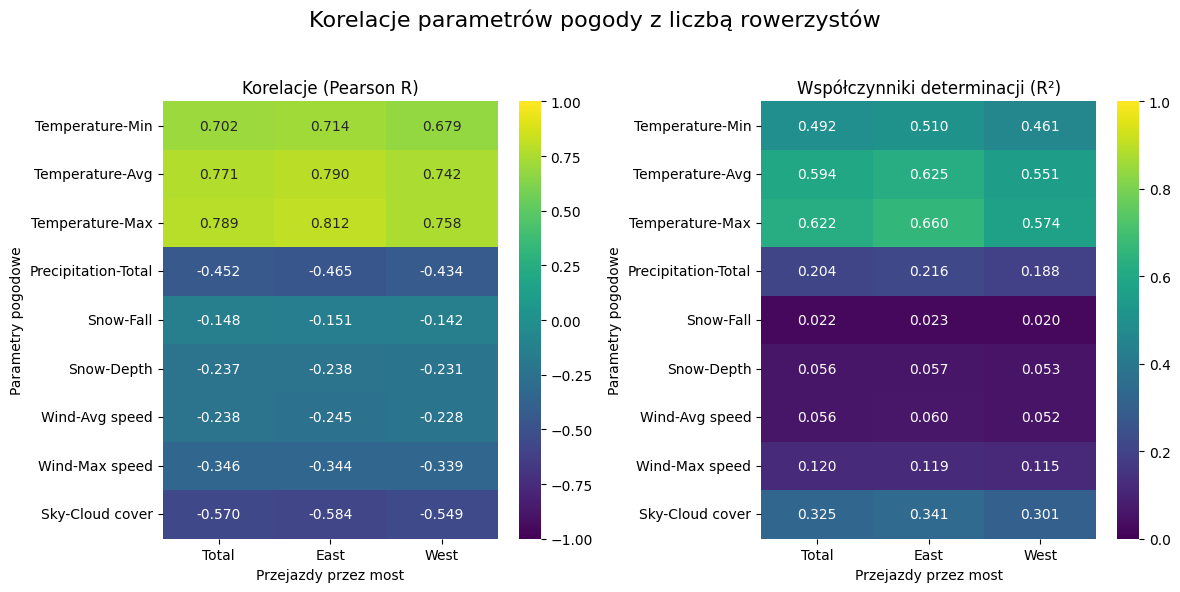

In [8]:
# Wykresy
# YOUR CODE HERE
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
fig.suptitle("Korelacje parametrów pogody z liczbą rowerzystów", fontsize=16)

#heatmapa dla R
sns.heatmap(
    R_corr_1.astype(float),
    annot=True,
    fmt=".3f",
    cmap="viridis",    
    vmin=-1, vmax=1,
    ax=axs[0]
)
axs[0].set_title("Korelacje (Pearson R)")
axs[0].set_xlabel("Przejazdy przez most")
axs[0].set_ylabel("Parametry pogodowe")

#heatmapa dla R^2
sns.heatmap(
    R2_corr_1.astype(float),
    annot=True,
    fmt=".3f",
    cmap="viridis",            
    vmin=0, vmax=1,
    ax=axs[1]
)
axs[1].set_title("Współczynniki determinacji (R²)")
axs[1].set_xlabel("Przejazdy przez most")
axs[1].set_ylabel("Parametry pogodowe")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### b) Korelacje liniowe między parametrami pogody

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_2` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_2` pomiędzy wartościami parametrów pogody.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
    > Kolumny: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [9]:
# Tablica R
# YOUR CODE HERE
R_corr_2 = weather_data.corr(method='pearson')
display(R_corr_2.style.format(precision=3))

In [10]:
# Tablica R^2
# YOUR CODE HERE
R2_corr_2 = R_corr_2 ** 2
display(R2_corr_2.style.format(precision=3))

In [11]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_2.loc[("Temperature", "Avg"), ('Snow', 'Fall')], -0.15332754676249075)
assert np.isclose(R_corr_2.loc[("Precipitation", "Total"), ("Wind", "Max speed")], 0.27117268223209673)
assert np.isclose(R_corr_2.loc[("Sky", "Cloud cover"), ("Temperature", "Max")], -0.6248338895216168)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_2.loc[("Snow", "Depth"), ("Wind", "Max speed")], 0.004732081693920376)
assert np.isclose(R2_corr_2.loc[("Temperature", "Min"), ("Temperature", "Avg")], 0.9373738975008452)
assert np.isclose(R2_corr_2.loc[("Precipitation", "Total"), ("Sky", "Cloud cover")], 0.12532191894477251)

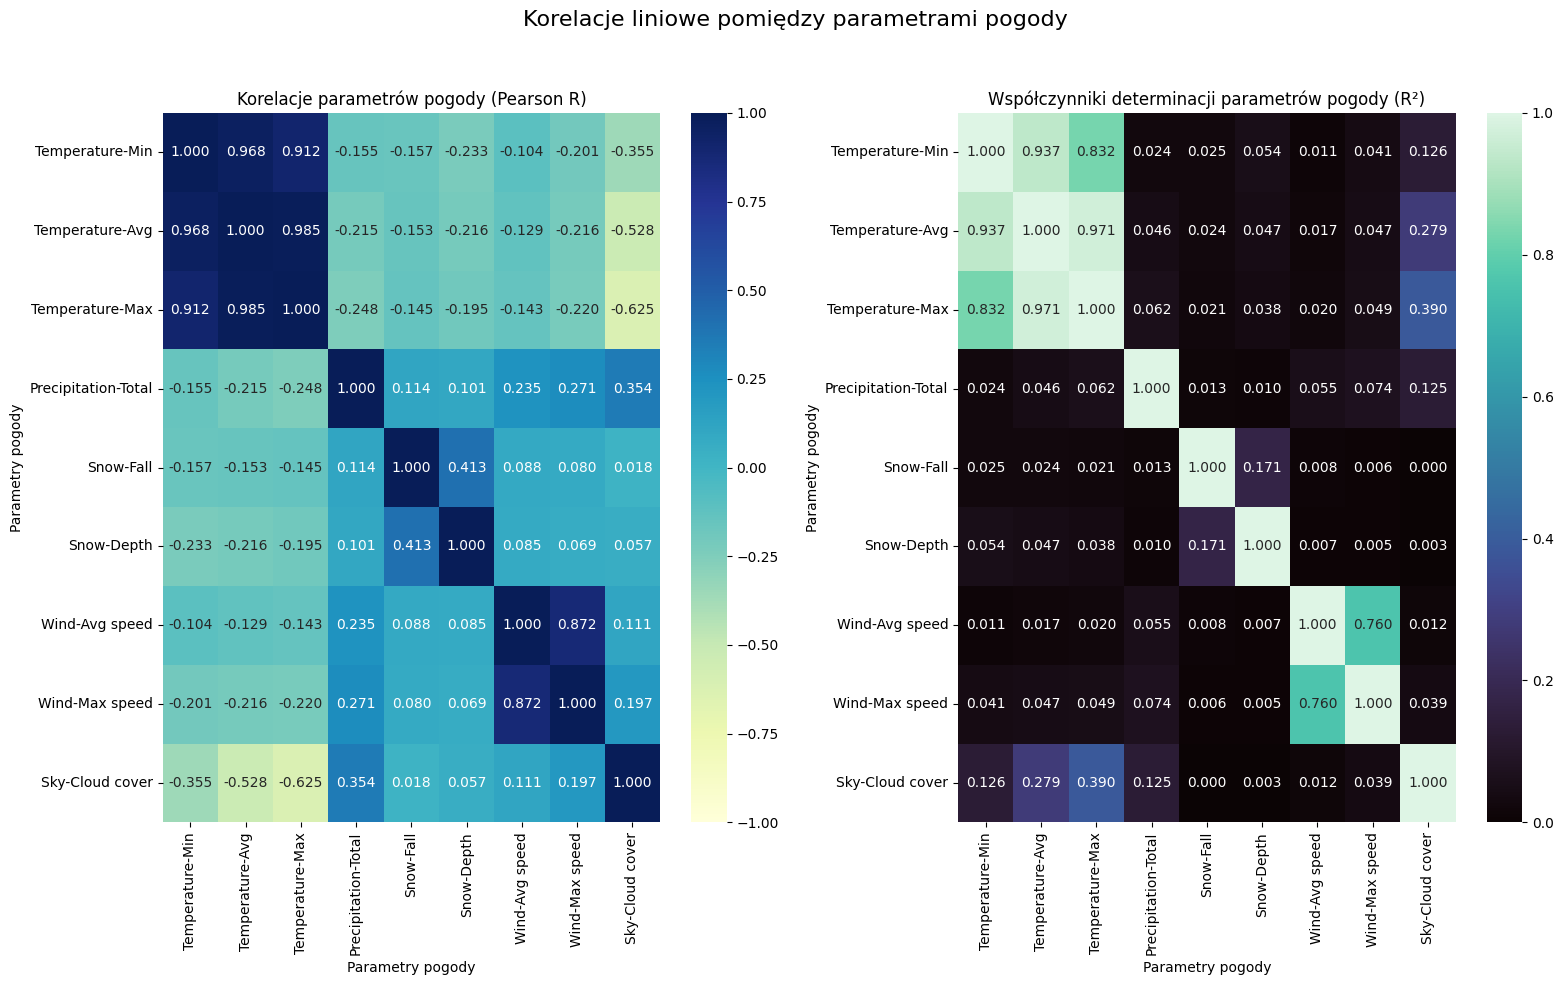

In [12]:
# Wykresy
# YOUR CODE HERE
fig, axs = plt.subplots(1, 2, figsize=(16, 10), facecolor='white')
fig.suptitle("Korelacje liniowe pomiędzy parametrami pogody", fontsize=16)

#heatmapa R_corr_2
sns.heatmap(
    R_corr_2.astype(float),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu", 
    vmin=-1, vmax=1,
    ax=axs[0]
)
axs[0].set_title("Korelacje parametrów pogody (Pearson R)")
axs[0].set_xlabel("Parametry pogody")
axs[0].set_ylabel("Parametry pogody")

#heatmapa R2_corr_2
sns.heatmap(
    R2_corr_2.astype(float),
    annot=True,
    fmt=".3f",
    cmap="mako",   
    vmin=0, vmax=1,
    ax=axs[1]
)
axs[1].set_title("Współczynniki determinacji parametrów pogody (R²)")
axs[1].set_xlabel("Parametry pogody")
axs[1].set_ylabel("Parametry pogody")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Zadnie 5: Analiza regresji [25 pkt]

#### a) Regresja liniowa

Korzystając z funkcji `scipy.stats.linregress()` przygotuj tablicę `regression_data_1` zawierającą wartości współczynników równania regresji liniowej pomiędzy wartościami parametrów pogody (zmienna niezależna, objaśniająca), a liczbą rowerzystów przejeżdżających przez most danego dnia (zmienna zależna, objaśniana).

- Tablica powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy weather_data</br>
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie prostymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [13]:
# Tabela
# YOUR CODE HERE
# Wspólne daty
common_idx = daily_bike_traffic_data.index.intersection(weather_data.index)
daily_bike_traffic_data = daily_bike_traffic_data.loc[common_idx]
weather_data = weather_data.loc[common_idx]

# Przygotowanie struktury
bike_cols = ["Total", "East", "West"]
params = weather_data.columns  # MultiIndex
cols = pd.MultiIndex.from_product([bike_cols, ["a", "b"]])
regression_data_1 = pd.DataFrame(index=params, columns=cols, dtype=float)

# Wypełnienie bez NaN
for prm in params:
    x = pd.to_numeric(weather_data[prm], errors="coerce")
    for side in bike_cols:
        y = pd.to_numeric(daily_bike_traffic_data[side], errors="coerce")

        # Usunięcie NaN z obu wektorów
        valid = x.notna() & y.notna()
        x_valid = x[valid]
        y_valid = y[valid]

        # Regresja tylko jeśli mamy min. 2 punkty
        if len(x_valid) >= 2:
            r = linregress(x_valid, y_valid)
            regression_data_1.loc[prm, (side, "a")] = r.slope
            regression_data_1.loc[prm, (side, "b")] = r.intercept
        else:
            regression_data_1.loc[prm, (side, "a")] = np.nan
            regression_data_1.loc[prm, (side, "b")] = np.nan

display(regression_data_1.style.format(precision=3))


In [14]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_1
assert np.isclose(regression_data_1.loc[("Temperature", "Avg"), ('Total', 'a')], 118.37455627981312)
assert np.isclose(regression_data_1.loc[("Snow", "Depth"), ('Total', 'b')], 2219.810729613734)
assert np.isclose(regression_data_1.loc[("Wind", "Avg speed"), ('East', 'a')], -74.72308463717329)
assert np.isclose(regression_data_1.loc[("Precipitation", "Total"), ('East', 'b')], 956.7960528263079)
assert np.isclose(regression_data_1.loc[("Temperature", "Min"), ('West', 'a')], 77.54619929276554)
assert np.isclose(regression_data_1.loc[("Wind", "Max speed"), ('West', 'b')], 1970.6955983993344)

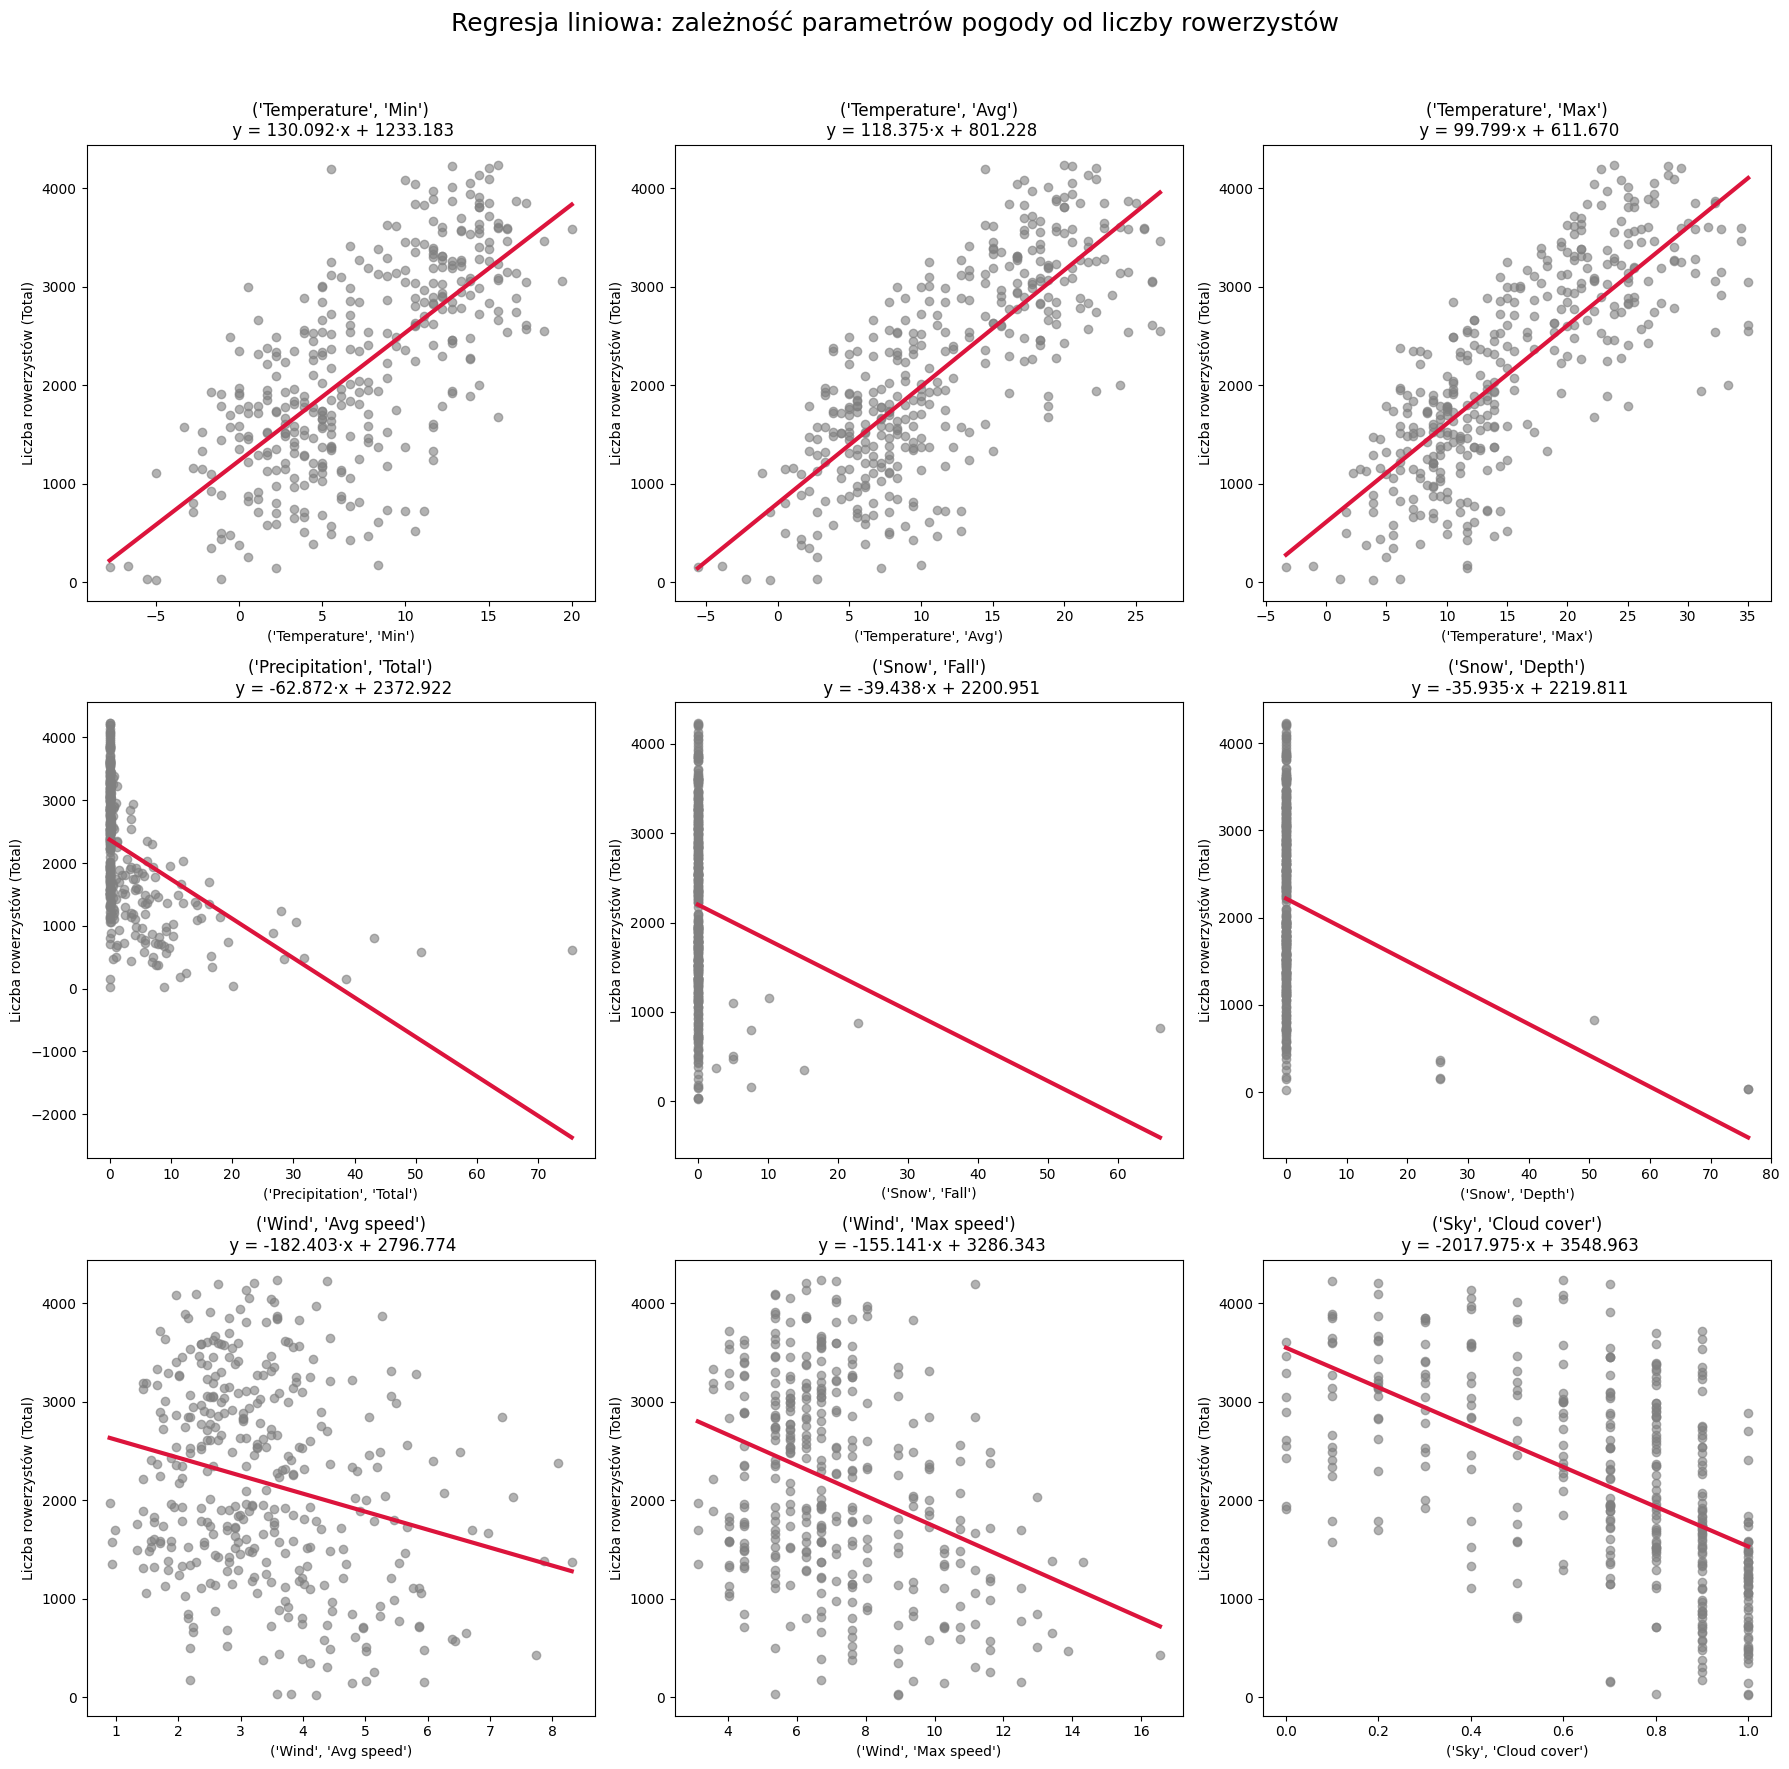

In [15]:
# Wykres
# YOUR CODE HERE
fig, axes = plt.subplots(3, 3, figsize=(18, 18), facecolor="white")
axes = axes.flatten()

for idx, param in enumerate(weather_data.columns):

    x_data = weather_data[param]
    y_data = daily_bike_traffic_data["Total"]
    
    intercept = regression_data_1.loc[param, ('Total', 'b')]
    slope = regression_data_1.loc[param, ('Total', 'a')]

    ax = axes[idx]
    ax.set_facecolor("white")
    ax.set_ylabel("Liczba rowerzystów (Total)")
    ax.set_xlabel(param)
    ax.scatter(x_data, y_data, alpha=0.6, color="gray")
    
    x_fit = np.linspace(x_data.min(), x_data.max(), 100)
    y_fit = slope * x_fit + intercept
    ax.plot(x_fit, y_fit, linewidth=3, color="crimson")
    
    ax.set_title(f"{param}\n y = {slope:.3f}·x + {intercept:.3f}")

fig.suptitle("Regresja liniowa: zależność parametrów pogody od liczby rowerzystów", fontsize=18)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### b) Regresja krzywoliniowa

Pobieżna analiza wykresów przygotowanych we wcześniejszym podpunkcie pokazuje, że w kilku przypadkach relacje między zmiennymi są bardziej skomplikowane i prosta regresja liniowa nie jest dobrym przybliżeniem obserwowanego trendu.

Korzystając z funkcji `scipy.optimize.curve_fit()` przygotuj tablicę `regression_data_2` zawierającą współczynniki równań regresji między zachmurzeniem, a liczbą rowerzystów przejeżdżających przez most danego dnia oraz między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia. W obu przypadkach skorzystaj z następującego równania regresji:
$$ y = a e^{-bx} + c$$ 
gdzie: a, b, c - współczynniki równania dobierane metodą najmniejszych kwadratów.

W przypadku regresji między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia ustaw parametry funkcji w taki sposób, aby wartość współczynnika c zawierała się w przedziale 90% - 110% wartości średniej liczby rowerzystów z 10 dni w roku z największą ilością opadów.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: </br>
    > 1 rzędu: Sky, Precipitation</br>
    > 2 rzędu: Cloud cover, Total (sparowane pojedynczo z odpowiadającymi im indeksami 1 rzędu tak jak w nazwach kolumn tablicy `weather_data`)</br>    
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b, c (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy liczby wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie krzywymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [16]:
rainiest_days_idx = weather_data.nlargest(10, ("Precipitation", "Total")).index
cyclist_top10_df = daily_bike_traffic_data.loc[rainiest_days_idx]

def regression_function(x, a, b, c):
    return a * np.exp(-b * x) + c

weather_features = [("Precipitation", "Total"), ("Sky", "Cloud cover")]
traffic_directions = daily_bike_traffic_data.columns
all_fit_parameters = []

for weather_metric in weather_features:
    fitted_params = []

    for idx, traffic_col in enumerate(traffic_directions):
        valid = (~weather_data[weather_metric].isna()) & (~daily_bike_traffic_data[traffic_col].isna())
        x_input = weather_data.loc[valid, weather_metric]
        y_output = daily_bike_traffic_data.loc[valid, traffic_col]

        if weather_metric == ("Precipitation", "Total"):
            popt, _ = curve_fit(
                regression_function,
                x_input,
                y_output,
                bounds=(
                    [-np.inf, -np.inf, 0.9 * (cyclist_top10_df.mean()).iloc[idx]],
                    [np.inf, np.inf, 1.1 * (cyclist_top10_df.mean()).iloc[idx]]
                ),
                maxfev=10000
            )
        else:
            popt, _ = curve_fit(
                regression_function,
                x_input,
                y_output,
                maxfev=10000
            )

        fitted_params.extend(popt)

    all_fit_parameters.append(fitted_params)

row_index = pd.MultiIndex.from_tuples(weather_features, names=["Weather", "Attribute"])
column_index = pd.MultiIndex.from_product([traffic_directions, ['a', 'b', 'c']], names=["Traffic", "Coeff"])

regression_data_2 = pd.DataFrame(all_fit_parameters, index=row_index, columns=column_index)

display(regression_data_2.style.format(precision=3))


C:\Users\sakla\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_2
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'a')], 1897.3445607675376)
assert np.isclose(regression_data_2.loc[(("Sky", "Cloud cover")), ('East', 'b')], -3.5974646434134456)
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'c')], 697.29)

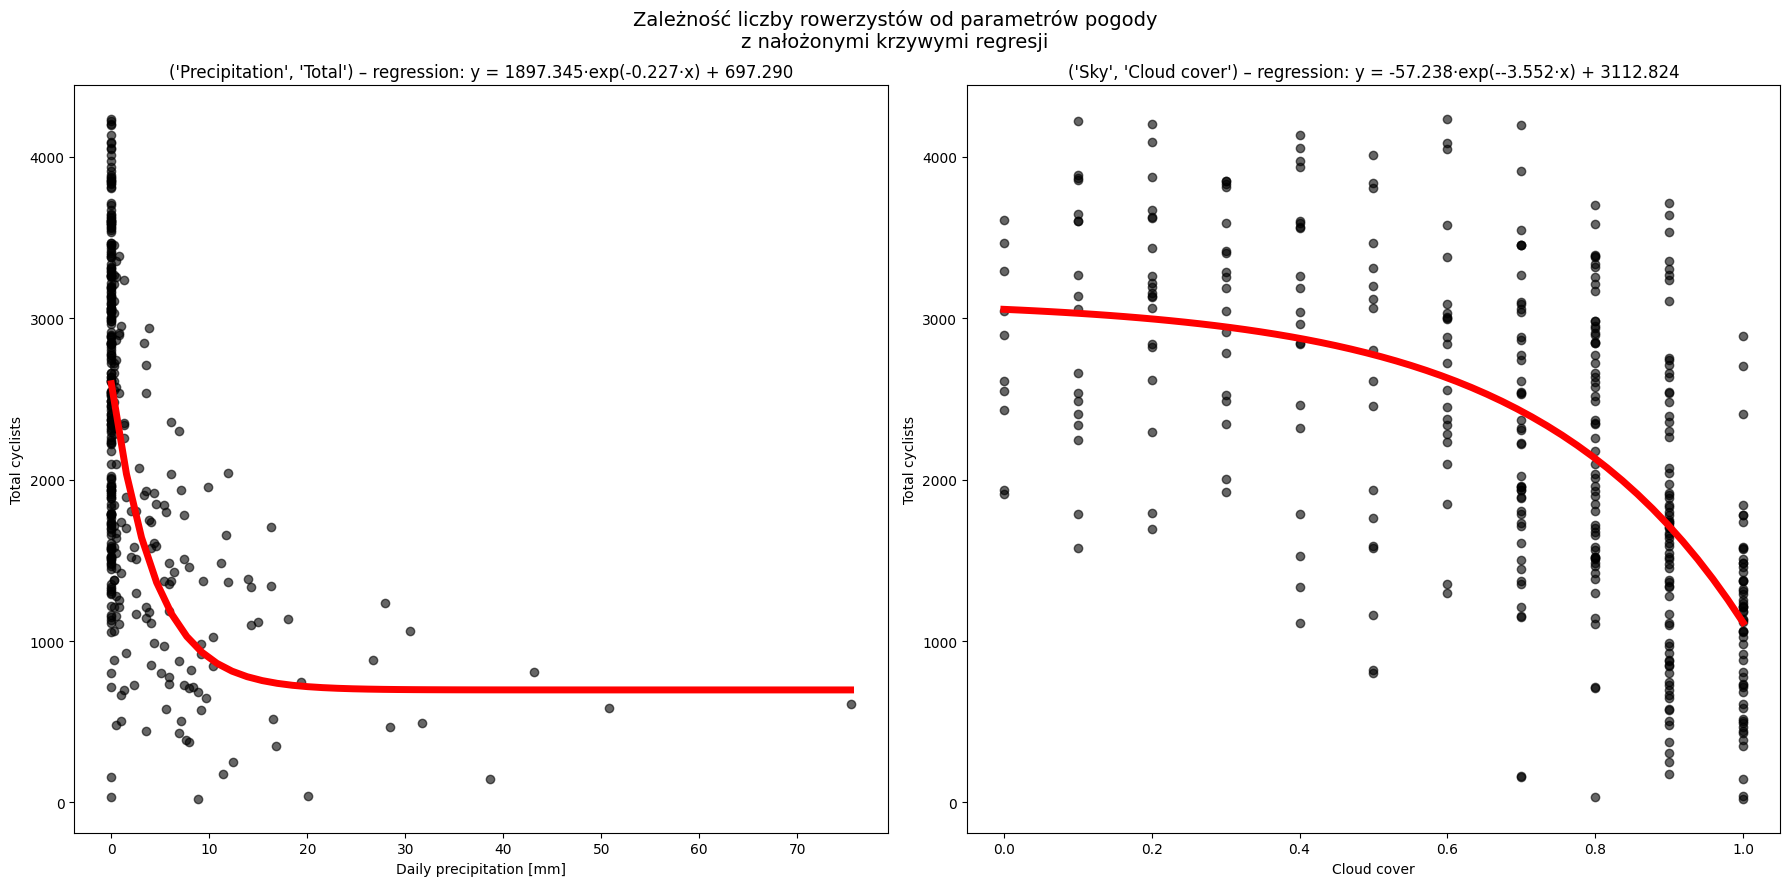

In [18]:
# Wykres
# YOUR CODE HERE
fig, axs = plt.subplots(1, 2, figsize=(18, 9), facecolor="white")

row0 = regression_data_2.iloc[0, 0:3]
x0_data = weather_data[weather_features[0]]
y_data = daily_bike_traffic_data.iloc[:, 0]

axs[0].set_facecolor("white")
axs[0].set_title(f"{weather_features[0]} – regression: y = {row0.iloc[0]:.3f}·exp(-{row0.iloc[1]:.3f}·x) + {row0.iloc[2]:.3f}")
axs[0].set_xlabel("Daily precipitation [mm]")
axs[0].set_ylabel("Total cyclists")
axs[0].scatter(x0_data, y_data, c="black", alpha=0.6, label="Data")
x_fit0 = np.linspace(x0_data.min(), x0_data.max())
axs[0].plot(x_fit0, row0.iloc[0] * np.exp(-row0.iloc[1] * x_fit0) + row0.iloc[2], c="red", linewidth=5, label="Regression")
#axs[0].legend(loc="upper right")

row1 = regression_data_2.iloc[1, 0:3]
x1_data = weather_data[weather_features[1]]

axs[1].set_facecolor("white")
axs[1].set_title(f"{weather_features[1]} – regression: y = {row1.iloc[0]:.3f}·exp(-{row1.iloc[1]:.3f}·x) + {row1.iloc[2]:.3f}")
axs[1].set_xlabel("Cloud cover")
axs[1].set_ylabel("Total cyclists")
axs[1].scatter(x1_data, y_data, c="black", alpha=0.6, label="Data")
x_fit1 = np.linspace(x1_data.min(), x1_data.max())
axs[1].plot(x_fit1, row1.iloc[0] * np.exp(-row1.iloc[1] * x_fit1) + row1.iloc[2], c="red", linewidth=5, label="Regression")
#axs[1].legend(loc="upper right")

fig.suptitle("Zależność liczby rowerzystów od parametrów pogody\nz nałożonymi krzywymi regresji", fontsize=14)
fig.tight_layout()
plt.show()
